# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

# Fundamental Data

In this notebook, you will learn to fetch fundamental data for stocks. You will fetch data such as balance sheet, cash flow and income statements from the `simfin` package.

The notebook is divided into the following parts:

1. [Stock Fundamental Data](#data)
    1. [Income Statements](#income)
    1. [Balance Sheets](#balance)
    1. [Cash Flow Statement](#cash)
1. [Utility to Fetch Fundamental Data](#func)
1. [Plot the Data](#plot)

Note: `simfin` is a third party library and is not maintained by QuantInsti. At times, downloading the data may give you errors due to changes in simfin library.

In such cases, it is recommended to upgrade the simfin package.

In [ ]:
# Update to the latest simfin library version
!pip install --upgrade simfin

## Import Libraries

In [1]:
# Import the SimFin library
import simfin as sf

# Import the names used for easy access to SimFin's data-columns
from simfin.names import *

# Import time manipulation library
from datetime import timedelta

# Import data manipulation library
import pandas as pd

# Import matplotlib and set the style for plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

<a id='data'></a> 
## Stock Fundamental Data

The fundamental data for stocks is fetched from the `simfin` library. The `simfin` library currently provides data for stocks from the US and Germany. For this illustration, we will use the stocks in the US market. The free dataset from [SimFin](https://simfin.com/data/bulk) will be used in this notebook.

<a id='data'></a> 
## Getting  the simfin API key

To get the free simfin API key, register your email id at https://simfin.com/. Confirm your email id by clicking on the link in the email shared by the simfin team. This will activate the free API key. Login to the simfin account and go to https://simfin.com/data/api to access the free API key.

The below code fetches the simfin API key of quantra using the get_simfin_api_key method of the FMDA_quantra module. However, while running the code on your local machine, you are requested to replace the API key placeholder text with the actual API key in the file FMDA_quantra.py. 

This file needs to be in the same folder as the current working directory, which is usually the folder where your notebook is being run from.

In [2]:
# Import libraries
import os
import sys
sys.path.append("..")

# Import the get_simfin_api_key from the FMDA_quantra module
# The code of this module can be found in the downloads (last section) of this course
# You need to edit FMDA_quantra.py file in the folder 'data_modules' and add your simfin API key manually before you continue
from data_modules.FMDA_quantra import get_simfin_api_key

# Method in FMDA_quantra module to get the simfin API key
simfin_api_key = get_simfin_api_key()

In [3]:
# SimFin data-directory
sf.set_data_dir('~/simfin_data/')

# SimFin API key
sf.config.set_api_key(api_key=simfin_api_key)

# Set the market as US
market = 'us'

# Define the stock ticker
stock_ticker = 'AAPL'

<a id='income'></a> 
## Income Statements

You will fetch the following data from the income statement:
1. Revenue
1. Operating Income
1. Pretax Income
1. Net Income

<a id='income_simfin'></a> 
### Quarterly Income Statements from SimFin

In [4]:
# Fetch quarterly income statements for all the tickers in SimFin database
income_data_simfin_all_stocks = sf.load_income(variant='quarterly', market=market)

# Get the quarterly income statement for the ticker
income_data_simfin = income_data_simfin_all_stocks.loc[stock_ticker,:]
income_data_simfin.tail()

Dataset "us-income-quarterly" on disk (0 days old).
- Loading from disk ... Done!


,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,...,Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common)
Report Date,,,,,,,,,,,,,,,,,,,,,
2021-03-31,111052,USD,2021,Q2,2021-04-29,2022-01-28,1.675348e+10,1.692916e+10,8.958400e+10,-5.150500e+10,...,508000000.0,NaN,28011000000,NaN,28011000000,-4.381000e+09,23630000000,NaN,23630000000,23630000000
2021-06-30,111052,USD,2021,Q3,2021-07-28,2022-04-29,1.684430e+10,1.702142e+10,8.143400e+10,-4.617900e+10,...,243000000.0,NaN,24369000000,NaN,24369000000,-2.625000e+09,21744000000,NaN,21744000000,21744000000
2021-09-30,111052,USD,2021,Q4,2021-10-29,2022-07-29,1.639172e+10,1.651929e+10,8.336000e+10,-4.818600e+10,...,-538000000.0,NaN,23248000000,NaN,23248000000,-2.697000e+09,20551000000,NaN,20551000000,20551000000
2021-12-31,111052,USD,2022,Q1,2022-01-28,2023-02-03,1.639172e+10,1.651929e+10,1.239450e+11,-6.970200e+10,...,-247000000.0,NaN,41241000000,NaN,41241000000,-6.611000e+09,34630000000,NaN,34630000000,34630000000
2022-03-31,111052,USD,2022,Q2,2022-04-29,2023-05-05,1.639172e+10,1.651929e+10,9.727800e+10,-5.471900e+10,...,160000000.0,NaN,30139000000,NaN,30139000000,-5.129000e+09,25010000000,NaN,25010000000,25010000000


<a id='balance'></a> 
## Balance Sheets

You will fetch the following data from the balance sheet:
1. Total Assets
1. Total Equity
1. Retained Earnings
1. Long Term Debt

<a id='balance_simfin'></a> 
### Quarterly Balance Sheets from SimFin

In [5]:
# Fetch quarterly balance sheets for all the tickers in SimFin database
balance_sheet_simfin_all_stocks = sf.load_balance(variant='quarterly', market=market)

# Get the quarterly balance sheets for the ticker
balance_sheet_simfin = balance_sheet_simfin_all_stocks.loc[stock_ticker,:]
balance_sheet_simfin.tail()

Dataset "us-balance-quarterly" on disk (0 days old).
- Loading from disk ... Done!


,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,...,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity
Report Date,,,,,,,,,,,,,,,,,,,,,
2021-03-31,111052,USD,2021,Q2,2021-04-29,2021-04-29,1.675348e+10,1.692916e+10,6.983400e+10,1.850300e+10,...,1.300300e+10,1.063850e+11,1.086420e+11,1.615950e+11,267980000000,5.420300e+10,NaN,1.526100e+10,6.917800e+10,337158000000
2021-06-30,111052,USD,2021,Q3,2021-07-28,2021-07-28,1.684430e+10,1.702142e+10,6.169600e+10,1.747500e+10,...,1.603900e+10,1.077540e+11,1.057520e+11,1.578060e+11,265560000000,5.498900e+10,NaN,9.233000e+09,6.428000e+10,329840000000
2021-09-30,111052,USD,2021,Q4,2021-10-29,2022-10-28,1.639172e+10,1.651929e+10,6.263900e+10,2.627800e+10,...,6.000000e+09,1.158680e+11,1.187190e+11,1.720440e+11,287912000000,5.736500e+10,NaN,5.562000e+09,6.309000e+10,351002000000
2021-12-31,111052,USD,2022,Q1,2022-01-28,2022-01-28,1.639172e+10,1.651929e+10,6.391300e+10,3.021300e+10,...,1.616900e+10,1.475740e+11,1.066290e+11,1.616850e+11,309259000000,5.842400e+10,NaN,1.443500e+10,7.193200e+10,381191000000
2022-03-31,111052,USD,2022,Q2,2022-04-29,2022-04-29,1.639172e+10,1.651929e+10,5.151100e+10,2.081500e+10,...,1.665800e+10,1.275080e+11,1.033230e+11,1.557550e+11,283263000000,6.118100e+10,NaN,1.271200e+10,6.739900e+10,350662000000


<a id='cash'></a> 
## Cashflow Statements

You will fetch the following data from the cashflow statement:
1. Net Cash from Operating Activities
1. Net Cash from Investing Activities
1. Net Cash from Financing Activities

<a id='cash_simfin'></a> 
### Quarterly Cashflow Statements from SimFin

In [6]:
# Fetch quarterly cash flow statements for all the tickers in SimFin database
cash_flow_simfin_all_stocks = sf.load_cashflow(variant='quarterly', market=market)

# Get the quarterly cash flow statements for the ticker
cash_flow_simfin = cash_flow_simfin_all_stocks.loc[stock_ticker,:]
cash_flow_simfin.tail()

Dataset "us-cashflow-quarterly" on disk (0 days old).
- Loading from disk ... Done!


,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Restated Date,Shares (Basic),Shares (Diluted),Net Income/Starting Line,Depreciation & Amortization,...,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash
Report Date,,,,,,,,,,,,,,,,,,,,,
2021-03-31,111052,USD,2021,Q2,2021-04-29,2022-01-28,1.675348e+10,1.692916e+10,2.363000e+10,2.797000e+09,...,2.398100e+10,-2.269000e+09,-7.895000e+09,-9000000.0,-1.036800e+10,-3.447000e+09,1.042300e+10,-1.854800e+10,-1.132600e+10,2287000000
2021-06-30,111052,USD,2021,Q3,2021-07-28,2022-04-29,1.684430e+10,1.702142e+10,2.174400e+10,2.832000e+09,...,2.109400e+10,-2.093000e+09,5.747000e+09,-4000000.0,3.572000e+09,-3.767000e+09,0.000000e+00,-2.290000e+10,-2.939600e+10,-4730000000
2021-09-30,111052,USD,2021,Q4,2021-10-29,2022-07-29,1.639172e+10,1.651929e+10,2.055100e+10,2.989000e+09,...,2.020000e+10,-3.223000e+09,4.352000e+09,-20000000.0,8.350000e+08,-3.640000e+09,3.220000e+09,-1.974800e+10,-2.038200e+10,653000000
2021-12-31,111052,USD,2022,Q1,2022-01-28,2023-02-03,1.639172e+10,1.651929e+10,3.463000e+10,2.697000e+09,...,4.696600e+10,-2.803000e+09,-1.292900e+10,NaN,-1.610600e+10,-3.732000e+09,-1.000000e+09,-2.047800e+10,-2.815900e+10,2701000000
2022-03-31,111052,USD,2022,Q2,2022-04-29,2023-02-03,1.639172e+10,1.651929e+10,2.501000e+10,2.737000e+09,...,2.816600e+10,-2.514000e+09,-6.390000e+09,NaN,-9.265000e+09,-3.595000e+09,-1.751000e+09,-2.263100e+10,-2.835100e+10,-9450000000




<a id='func'></a> 
## Utility to Fetch Fundamental Data

The code to fetch the asset's quarterly fundamental data is put in a Python function so that we can use it later for easily fetching the data for other assets. This function will be placed in the `FMDA_quantra.py` file in the `data_modules` folder.

In [7]:
# Define the utility to get the fundamental data for any asset ticker
def get_fundamental_data(asset_ticker):    
    
    # SimFin data-directory
    sf.set_data_dir('~/simfin_data/')

    # SimFin use the free data API key
    simfin_api_key = get_simfin_api_key()
    sf.config.set_api_key(api_key=simfin_api_key)

    # Set the market as US
    market = 'us'

    # Fetch quarterly income statements for all the tickers in SimFin database
    income_data_simfin_all_stocks = sf.load_income(variant='quarterly', market=market)

    # Get the quarterly income statement for the ticker
    income_data = income_data_simfin_all_stocks.loc[asset_ticker,:]


    # Fetch quarterly balance sheets for all the tickers in SimFin database
    balance_sheet_simfin_all_stocks = sf.load_balance(variant='quarterly', market=market)

    # Get the quarterly balance sheets for the ticker
    balance_sheet_data = balance_sheet_simfin_all_stocks.loc[asset_ticker,:]

    
    # Fetch quarterly cash flow statements for all the tickers in SimFin database
    cash_flow_simfin_all_stocks = sf.load_cashflow(variant='quarterly', market=market)

    # Get the quarterly cash flow statements for the ticker
    cash_flow_data = cash_flow_simfin_all_stocks.loc[asset_ticker,:]


    # Return the income statement, balance sheet and cashflow data
    return income_data, balance_sheet_data, cash_flow_data

In [8]:
# Call the function we defined above for another asset, say, Microsoft (MSFT)
msft_income_data,\
    msft_balance_sheet_data,\
        msft_cash_flow_data = get_fundamental_data("MSFT")

Dataset "us-income-quarterly" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-balance-quarterly" on disk (0 days old).
- Loading from disk ... Done!
Dataset "us-cashflow-quarterly" on disk (0 days old).
- Loading from disk ... Done!


<a id='plot'></a> 
## Plot the Data

The fundamental data fetched above is plotted for better visualisation.

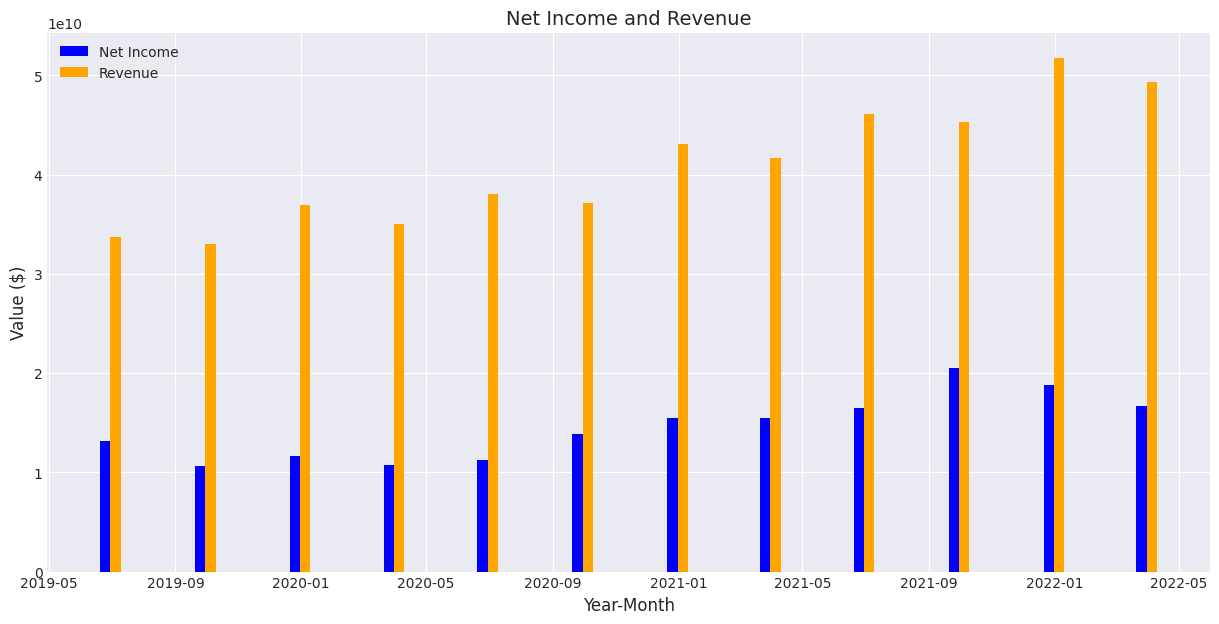

In [9]:
# Plot the net income and revenue for the last 3 years
data_to_plot = msft_income_data.tail(12)
data = [data_to_plot['Net Income'],
       data_to_plot['Revenue']]
X = data_to_plot.index
plt.figure(figsize=(15, 7))

# Plot the bar chart
plt.bar(X + timedelta(-5), data[0], color = 'b', width = 10, label="Net Income")
plt.bar(X + timedelta(5), data[1], color = 'orange', width = 10, label="Revenue")

# Set title and labels for the plot
plt.title('Net Income and Revenue', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Value ($)', fontsize=12)
plt.legend()
plt.show()

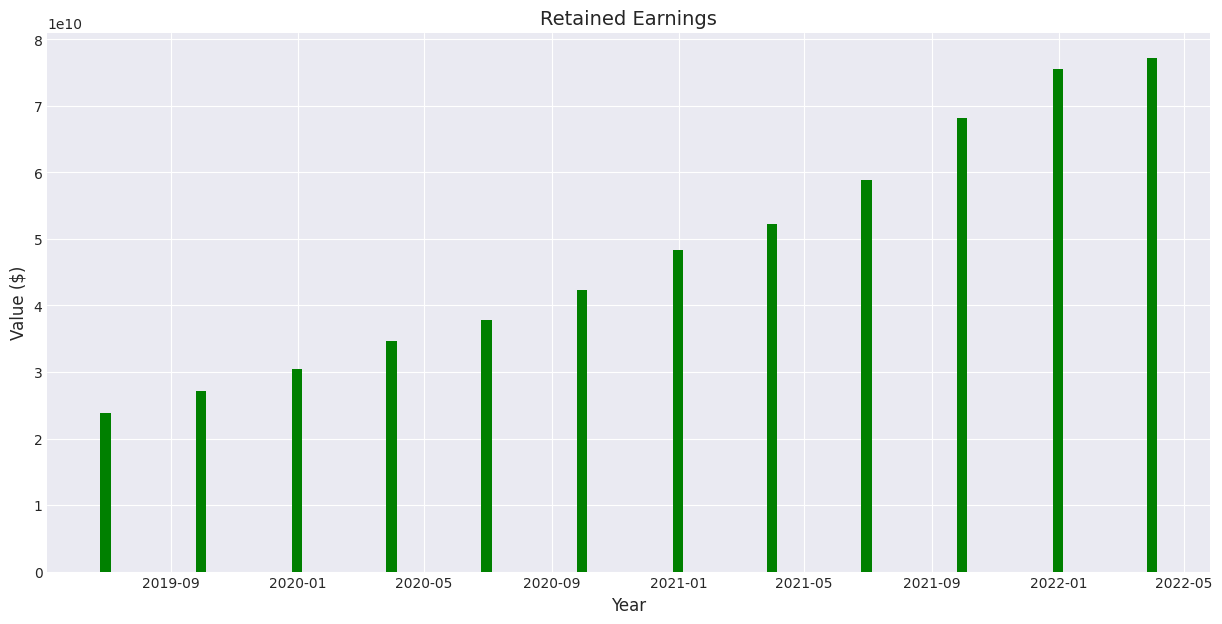

In [10]:
# Plot the retained earnings for the last 3 years
data_to_plot = msft_balance_sheet_data.tail(12)
data = [data_to_plot['Retained Earnings']]
X = data_to_plot.index
plt.figure(figsize=(15, 7))

# Plot the bar chart
plt.bar(X, data[0], color = 'green', width = 10, label="Operating Activities")

# Set title and labels for the plot
plt.title('Retained Earnings', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value ($)', fontsize=12)
plt.show()

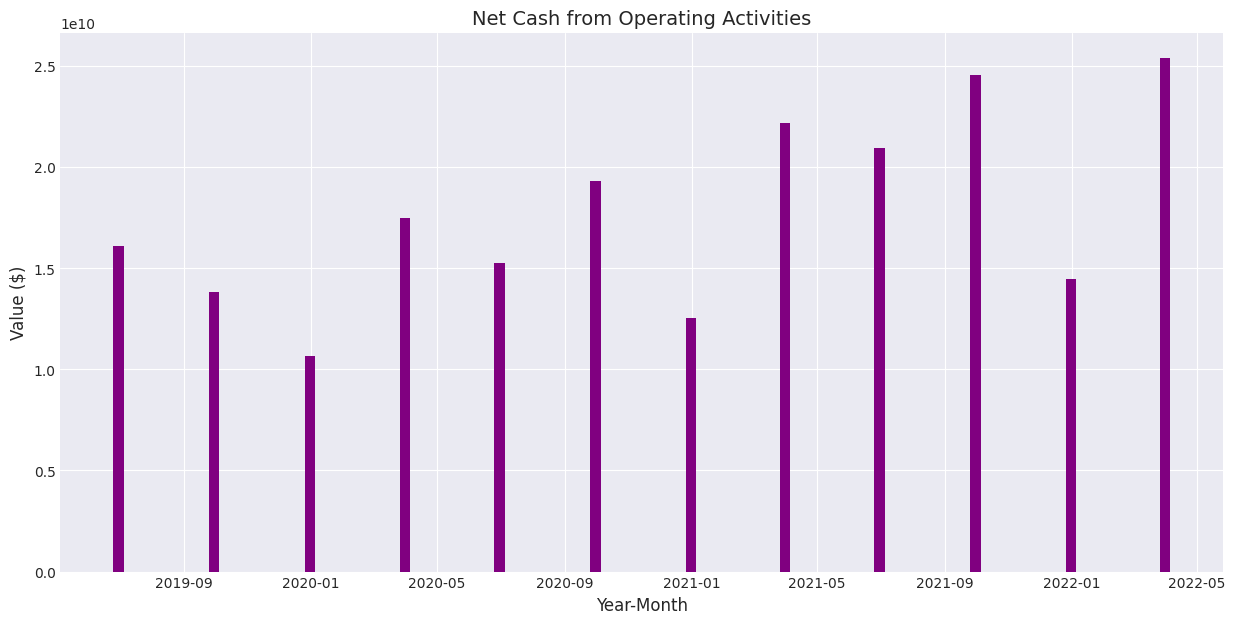

In [11]:
# Plot the cashflow data for the last 3 years
data_to_plot = msft_cash_flow_data.tail(12)
data = [data_to_plot['Net Cash from Operating Activities']]
X = data_to_plot.index
plt.figure(figsize=(15, 7))

# Plot the bar chart
plt.bar(X, data[0], color = 'purple', width = 10, label="Operating Activities")

# Set title and labels for the plot
plt.title('Net Cash from Operating Activities', fontsize=14)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Value ($)', fontsize=12)
plt.show()

In the upcoming notebook, you will learn to calculate various financial ratios.
<br><br>